(750, 1174, 3)

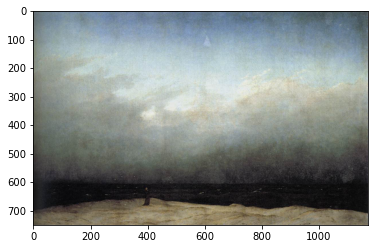

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# read in image

img1 = plt.imread('img1.jpeg')
plt.imshow(img1)
img1.shape

[[[112 118 114]
  [106 116 126]
  [110 120 129]
  ...
  [ 73  87  90]
  [ 80  89  94]
  [ 90 100 102]]

 [[111 117 113]
  [100 110 120]
  [106 116 125]
  ...
  [ 73  87  90]
  [ 73  82  87]
  [ 88  98 100]]

 [[101 107 105]
  [103 113 122]
  [105 119 128]
  ...
  [ 72  86  95]
  [ 72  87  94]
  [ 83  95 107]]

 ...

 [[ 83  73  63]
  [ 93  83  73]
  [ 78  76  64]
  ...
  [135 126 111]
  [108 100  81]
  [121 116 110]]

 [[ 86  78  59]
  [ 97  89  70]
  [103  96  80]
  ...
  [ 97  88  73]
  [106  98  79]
  [112 110  89]]

 [[ 90  85  65]
  [ 85  80  60]
  [104  96  75]
  ...
  [123 111  97]
  [108 102  86]
  [119 116  99]]]


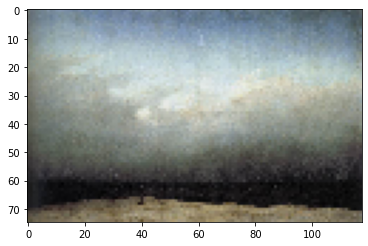

In [4]:
# plot each pixel RGB value as points in 3D space

# subsample the image
img1 = img1[::10,::10,:]
print(img1)
img1_flatten = img1.reshape(-1,3)
plt.imshow(img1_flatten.reshape(img1.shape))

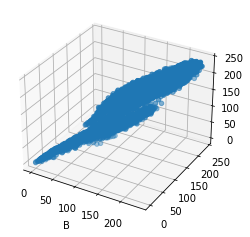

In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(img1_flatten[:,0],img1_flatten[:,1],img1_flatten[:,2])
ax.set_xlabel('R')
ax.set_xlabel('G')
ax.set_xlabel('B')
plt.show()

In [6]:
# try clustering using K-Means to find the representative color
def kmeans(data, k=5, iter_limit=1000, vis=False):
    # data: a collection of data points of shape nxd
    # obtain min and max for the bound
    lower = data.min(axis=0)
    upper = data.max(axis=0)
    # * initialize centroids uniformly in [lower, upper]
    # caveat: bad initialization can break K-Means
    # caveat: the following might cause unused centroids
    centroids = np.random.uniform(low=lower, high=upper, size=(k,len(lower)))
    # caveat: the following might not work well when the data is unbalanced
    # centroid_indices = np.random.choice(len(data), size=k)
    # centroids = np.array(data[centroid_indices])
    print("init centroids: ")
    print(centroids)
    # * repeat until convergence
    prev_centroids = np.array(centroids)
    prev_assignments = None
    kmeans_i = 0
    for kmeans_i in range(iter_limit):
        print('iteration: %d' % (kmeans_i))
        assignments = []
        # * update cluster assignment
        for i in range(len(data)):
            idx = np.argmin(np.linalg.norm(data[i] - centroids, axis=1))
            assignments.append(idx)
        assignments = np.array(assignments)
        # * update centroids based on assignment
        for i in range(k):
            centroids[i] = np.mean(data[assignments==i], axis=0)
            # if some centroids have no assignments, reinitialize it
            if (assignments==i).sum() == 0:
                centroids[i] = np.random.uniform(low=lower, high=upper)
        # * check for convergence
        print('centroids move by: %f' % (np.linalg.norm(centroids - prev_centroids, axis=1).max()))
        if prev_assignments is not None:
            print('assignment differs by: %d' % (np.sum((assignments - prev_assignments)!=0)))
        if prev_assignments is not None and np.linalg.norm(assignments - prev_assignments) == 0.:
            break
        
        prev_assignments = assignments
        prev_centroids = np.array(centroids)

        # plot the points (for toy problem)
        if vis:
            plt.figure()
            plt.scatter(data[assignments==0][:,0],data[assignments==0][:,1], c='r')
            plt.scatter(data[assignments==1][:,0],data[assignments==1][:,1], c='g')
            plt.scatter(data[assignments==2][:,0],data[assignments==2][:,1], c='b')

            plt.scatter(centroids[:,0], centroids[:,1], c=['r','g','b'])
            plt.show()
    
    return centroids, assignments

        

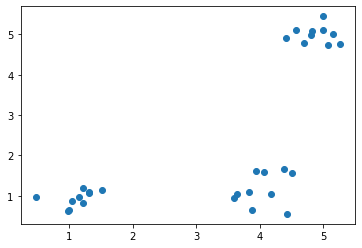

In [7]:
toy_data = np.concatenate([np.random.normal(loc=[1,1], scale=0.3, size=(10,2)), \
                           np.random.normal(loc=[5,5], scale=0.3, size=(10,2)), \
                           np.random.normal(loc=[4,1], scale=0.3, size=(10,2))], axis=0)
plt.scatter(toy_data[:,0], toy_data[:,1])

[0.47578613 0.55170598]
[5.26994571 5.44914177]
init centroids: 
[[2.65520204 4.80242765]
 [2.71432413 3.2783842 ]
 [4.65378143 0.55877277]]
iteration: 0
centroids move by: 2.823299


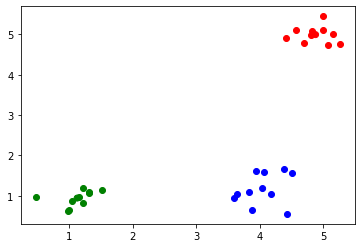

iteration: 1
centroids move by: 0.000000
assignment differs by: 0


In [8]:
# data-based initialization works better in this case (uniform initialization may cause unassigned centroids)
centroids, assignments = kmeans(toy_data, 3, iter_limit=100, vis=True)

(11640, 3)

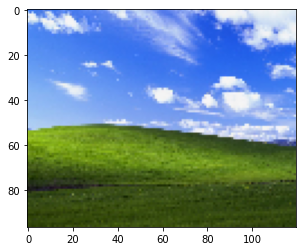

In [182]:
plt.imshow(img1_flatten.reshape(img1.shape))
img1_flatten.shape

In [186]:
k = 5
centroids, assignments = kmeans(img1_flatten, k, iter_limit=1000)

init centroids: 
[[221.12688187  18.93052856 221.32755874]
 [ 79.48338587 193.23694168 208.07382728]
 [ 39.44351294 240.0212246  164.93621515]
 [ 43.05289603 105.68498962 198.87943266]
 [ 85.66068238 210.87128819 215.29862556]]
iteration: 0
centroids move by: 176.595817
iteration: 1
centroids move by: 227.033405
assignment differs by: 3629
iteration: 2
centroids move by: 42.315662
assignment differs by: 464
iteration: 3
centroids move by: 25.055467
assignment differs by: 371
iteration: 4
centroids move by: 9.386911
assignment differs by: 340
iteration: 5
centroids move by: 5.499790
assignment differs by: 270
iteration: 6
centroids move by: 3.298955
assignment differs by: 183
iteration: 7
centroids move by: 2.428284
assignment differs by: 132
iteration: 8
centroids move by: 1.804589
assignment differs by: 97
iteration: 9
centroids move by: 1.238254
assignment differs by: 65
iteration: 10
centroids move by: 1.017471
assignment differs by: 53
iteration: 11
centroids move by: 0.778930
assi

In [187]:
print(centroids)

[[118.00305499 154.80244399  33.24439919]
 [ 82.0680798  131.45137157 237.79850374]
 [ 86.65949486 116.77081384  30.03461179]
 [ 53.17848895  73.17354009  20.33718245]
 [180.10753532 201.39795918 242.42543171]]


(97, 120, 3)


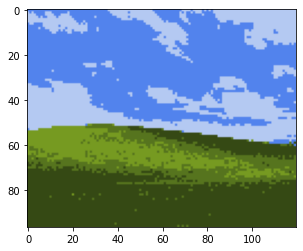

In [188]:
# convert each of the image pixel using the assigned centroids
img1_res = np.array(img1_flatten)
for i in range(k):
    img1_res[assignments==i] = centroids[i]
img1_res = img1_res.reshape(img1.shape)
print(img1_res.shape)
# show the replaced image
plt.imshow(img1_res)

init centroids: 
[[231.46206169 152.82705922 200.91882395]
 [103.12840133  59.27880289 235.82259815]
 [ 75.39072605  50.33652717 131.51508064]]
iteration: 0
centroids move by: 116.469181
iteration: 1
centroids move by: 0.844539
assignment differs by: 58
iteration: 2
centroids move by: 0.164890
assignment differs by: 8
iteration: 3
centroids move by: 0.094795
assignment differs by: 4
iteration: 4
centroids move by: 0.070825
assignment differs by: 3
iteration: 5
centroids move by: 0.047619
assignment differs by: 2
iteration: 6
centroids move by: 0.000000
assignment differs by: 0
init centroids: 
[[ 49.1211111   59.15756318 146.50031546]
 [ 19.12373196 186.78434193 241.2281636 ]
 [187.97334679 207.17646419  19.82206539]
 [140.75833531 235.47857161   9.3442964 ]]
iteration: 0
centroids move by: 114.398339
iteration: 1
centroids move by: 19.697777
assignment differs by: 557
iteration: 2
centroids move by: 7.357841
assignment differs by: 256
iteration: 3
centroids move by: 4.711378
assignmen

centroids move by: 0.056759
assignment differs by: 2
iteration: 32
centroids move by: 0.000000
assignment differs by: 0
init centroids: 
[[161.41539182  45.55837405 133.41672739]
 [246.49634662 166.39072796 110.5994875 ]
 [122.1467462   63.54378902  82.86090882]
 [ 52.478494    90.44985112  37.09526634]
 [117.00402884  28.38047893  91.13774747]
 [173.1993666   19.39247272 117.38037147]
 [154.83503629 189.63248676 231.34415202]
 [119.80068594  60.85838092 252.93129373]]
iteration: 0
centroids move by: 143.278614
iteration: 1
centroids move by: 44.164705
assignment differs by: 1697
iteration: 2
centroids move by: 22.771434
assignment differs by: 2384
iteration: 3
centroids move by: 12.865455
assignment differs by: 831
iteration: 4
centroids move by: 6.643479
assignment differs by: 456
iteration: 5
centroids move by: 4.476088
assignment differs by: 359
iteration: 6
centroids move by: 4.101656
assignment differs by: 278
iteration: 7
centroids move by: 2.635195
assignment differs by: 192
it

centroids move by: 0.521598
assignment differs by: 34
iteration: 23
centroids move by: 0.282564
assignment differs by: 19
iteration: 24
centroids move by: 0.187924
assignment differs by: 13
iteration: 25
centroids move by: 0.179492
assignment differs by: 11
iteration: 26
centroids move by: 0.117652
assignment differs by: 8
iteration: 27
centroids move by: 0.110196
assignment differs by: 7
iteration: 28
centroids move by: 0.031828
assignment differs by: 2
iteration: 29
centroids move by: 0.018579
assignment differs by: 1
iteration: 30
centroids move by: 0.000000
assignment differs by: 0
init centroids: 
[[103.03409066 239.03982937  17.31752923]
 [147.18033871 228.90557757 199.20126682]
 [117.91954795 145.05804438 228.80066816]
 [182.6838017  160.57318527 106.18893004]
 [178.46944004  83.37110404  46.67365406]
 [167.47752143 243.35083564  36.03734346]
 [202.31665495 202.26115369 238.4222517 ]
 [ 68.16033995 180.14830587  98.42170813]
 [247.69934003 238.71590261 195.13794208]
 [223.281996

centroids move by: 1.468392
assignment differs by: 82
iteration: 20
centroids move by: 3.370700
assignment differs by: 79
iteration: 21
centroids move by: 3.428801
assignment differs by: 77
iteration: 22
centroids move by: 6.446312
assignment differs by: 72
iteration: 23
centroids move by: 5.898287
assignment differs by: 85
iteration: 24
centroids move by: 11.688059
assignment differs by: 130
iteration: 25
centroids move by: 12.766760
assignment differs by: 249
iteration: 26
centroids move by: 6.782042
assignment differs by: 355
iteration: 27
centroids move by: 2.276512
assignment differs by: 275
iteration: 28
centroids move by: 3.728600
assignment differs by: 197
iteration: 29
centroids move by: 7.407444
assignment differs by: 142
iteration: 30
centroids move by: 3.659441
assignment differs by: 124
iteration: 31
centroids move by: 5.898226
assignment differs by: 74
iteration: 32
centroids move by: 12.691513
assignment differs by: 66
iteration: 33
centroids move by: 4.471517
assignment

assignment differs by: 6
iteration: 82
centroids move by: 0.130877
assignment differs by: 9
iteration: 83
centroids move by: 0.089079
assignment differs by: 6
iteration: 84
centroids move by: 0.077634
assignment differs by: 5
iteration: 85
centroids move by: 0.108232
assignment differs by: 5
iteration: 86
centroids move by: 0.017644
assignment differs by: 1
iteration: 87
centroids move by: 0.016342
assignment differs by: 1
iteration: 88
centroids move by: 0.000000
assignment differs by: 0
init centroids: 
[[ 77.33327514 167.54023424 248.27534119]
 [166.37970602 170.24512955 168.31411243]
 [ 89.99535842 124.77767276 233.99003921]
 [110.71188063  68.08680196 159.24061092]
 [215.35049034 216.13028712  88.68111623]
 [ 50.05876697 202.28947397 129.79794477]
 [ 82.06724368 200.15500847 187.65526895]
 [177.76740249  88.16154819 111.33547825]
 [231.28975529 104.88708745   7.19473774]
 [227.41057041 103.60782608 230.23563251]
 [202.30704485 180.92010003 151.70342999]
 [247.18018955 190.88746402

centroids move by: 257.444069
iteration: 1
centroids move by: 262.769145
assignment differs by: 2480
iteration: 2
centroids move by: 173.736360
assignment differs by: 1512
iteration: 3
centroids move by: 47.488040
assignment differs by: 726
iteration: 4
centroids move by: 21.842873
assignment differs by: 391
iteration: 5
centroids move by: 9.668822
assignment differs by: 287
iteration: 6
centroids move by: 8.493233
assignment differs by: 253
iteration: 7
centroids move by: 10.017169
assignment differs by: 256
iteration: 8
centroids move by: 4.443416
assignment differs by: 244
iteration: 9
centroids move by: 3.047991
assignment differs by: 237
iteration: 10
centroids move by: 3.346641
assignment differs by: 204
iteration: 11
centroids move by: 2.571208
assignment differs by: 191
iteration: 12
centroids move by: 2.074441
assignment differs by: 202
iteration: 13
centroids move by: 1.745197
assignment differs by: 210
iteration: 14
centroids move by: 1.580074
assignment differs by: 219
iter

centroids move by: 10.169767
assignment differs by: 86
iteration: 33
centroids move by: 1.465176
assignment differs by: 70
iteration: 34
centroids move by: 0.463758
assignment differs by: 66
iteration: 35
centroids move by: 0.467687
assignment differs by: 52
iteration: 36
centroids move by: 0.407960
assignment differs by: 32
iteration: 37
centroids move by: 0.320173
assignment differs by: 32
iteration: 38
centroids move by: 0.235641
assignment differs by: 30
iteration: 39
centroids move by: 0.273309
assignment differs by: 30
iteration: 40
centroids move by: 0.345428
assignment differs by: 40
iteration: 41
centroids move by: 0.389499
assignment differs by: 31
iteration: 42
centroids move by: 0.416220
assignment differs by: 37
iteration: 43
centroids move by: 0.499029
assignment differs by: 39
iteration: 44
centroids move by: 0.426927
assignment differs by: 28
iteration: 45
centroids move by: 0.622057
assignment differs by: 45
iteration: 46
centroids move by: 0.552530
assignment differs 

centroids move by: 174.639650
assignment differs by: 1602
iteration: 2
centroids move by: 238.848797
assignment differs by: 812
iteration: 3
centroids move by: 240.153257
assignment differs by: 866
iteration: 4
centroids move by: 97.319356
assignment differs by: 937
iteration: 5
centroids move by: 98.936421
assignment differs by: 568
iteration: 6
centroids move by: 92.357537
assignment differs by: 627
iteration: 7
centroids move by: 14.740291
assignment differs by: 747
iteration: 8
centroids move by: 10.422002
assignment differs by: 480
iteration: 9
centroids move by: 13.985608
assignment differs by: 436
iteration: 10
centroids move by: 10.273184
assignment differs by: 484
iteration: 11
centroids move by: 5.239941
assignment differs by: 596
iteration: 12
centroids move by: 5.477226
assignment differs by: 503
iteration: 13
centroids move by: 8.153211
assignment differs by: 396
iteration: 14
centroids move by: 9.216362
assignment differs by: 363
iteration: 15
centroids move by: 5.388835


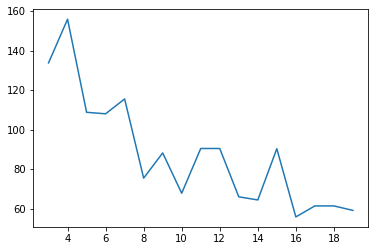

In [140]:
# the elbow method for finding best k
# metrics for defining loss: farthest point-to-centroid distance

errors = []
ks = []
for k in range(3, 20):
    centroids, assignments = kmeans(img1_flatten, k, iter_limit=1000)
    # compute the distance in each cluster
    max_dist = 0.
    for i in range(k):
        dist = np.linalg.norm(img1_flatten[assignments==i] - centroids[i], axis=1).max()
        if dist > max_dist:
            max_dist = dist
    errors.append(max_dist)
    ks.append(k)

plt.plot(ks, errors)